In [1]:
#Import necessary packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import and print 5 rows of the movie csv file 
movies = pd.read_csv('movies.csv')

print(movies.info())
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
movieId    9742 non-null int64
title      9742 non-null object
genres     9742 non-null object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
#Import and print 5 rows of the ratings csv file 
ratings = pd.read_csv('ratings.csv')

print(ratings.info())
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
userId       100836 non-null int64
movieId      100836 non-null int64
rating       100836 non-null float64
timestamp    100836 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
#Import and print 5 rows of the tags csv file 
tags = pd.read_csv('tags.csv')

tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [5]:
#Explore number of unique movies in the movies DataFrame

print('Number of movies: ', movies['movieId'].nunique())


Number of movies:  9742


In [6]:
#Explore the unique columns in the ratings DataFrame
ratings.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

In [7]:
#Join the movies and ratings DataFrames on "movieId"
df = pd.merge(movies, ratings, on='movieId', how='left')

In [8]:
#Print final DataFrame
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


In [9]:
#Drop 'timestamp' as this column is unnecessary
data = df.drop(['timestamp'], axis=1)

In [32]:
#Add a feature 'year' that shows which year the movie is from 
data['year'] = data['title'].str.extract('.*\((.*)\).*',expand = False)
data.head(5)

,movieId,title,genres,userId,rating,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1995


In [10]:

# data.drop_duplicates(inplace=True)

In [11]:
#Check for NA values 
data.isna().sum()

movieId     0
title       0
genres      0
userId     18
rating     18
dtype: int64

In [12]:
#Drop any NA values 
data.dropna(inplace=True)

In [13]:
#Confirm all the NA values are removed
data.isna().sum()

movieId    0
title      0
genres     0
userId     0
rating     0
dtype: int64

In [14]:
data['movieId'].value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
5922        1
153386      1
57147       1
5986        1
8196        1
Name: movieId, Length: 9724, dtype: int64

In [15]:
data['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [16]:
#Print the average ratings of movies 
data.groupby('title').mean()['rating'].sort_values(ascending=False)

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
                                                ... 
The Beast of Hollow Mountain (1956)              0.5
Follow Me, Boys! (1966)                          0.5
The Butterfly Effect 3: Revelations (2009)       0.5
The Emoji Movie (2017)                           0.5
Rust and Bone (De rouille et d'os) (2012)        0.5
Name: rating, Length: 9719, dtype: float64

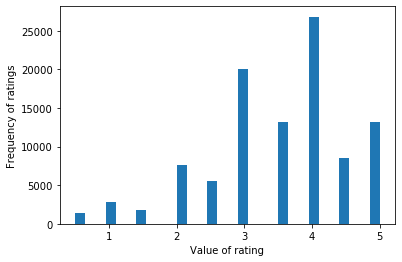

In [17]:
#Plot a histogram of the frequency of certain rating values

plt.hist(data['rating'],bins=30)
plt.xlabel('Value of rating')
plt.ylabel('Frequency of ratings')
plt.show()

In [30]:
# Look at how many times each movie has been watched
data.groupby('title').size().sort_values(ascending=False)

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
                                                                                 ... 
Late Night Shopping (2001)                                                          1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)      1
Late Shift, The (1996)                                                              1
Latter Days (2003)                                                                  1
'71 (2014)                                                                          1
Length: 9719, dtype: int64

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


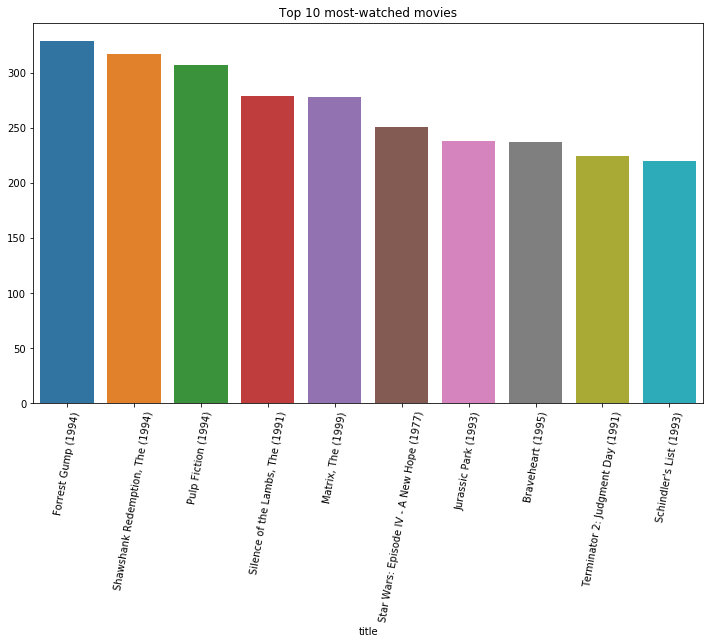

In [31]:
#Plot the top 10 most watched movies
plt.figure(figsize=(12,7))
topmovies = data.groupby('title').size().sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 most-watched movies')
plt.xticks(rotation=80);